In [14]:
# EJERCICIO 1

In [1]:
# 1. Check if your country is a polygon or multipolygon.

In [2]:
import os


import geopandas as gpd
from  fiona import listlayers

#mapa
canadamaps='maps/canadaMaps.gpkg'

#layers in maps
listlayers(canadamaps)

['countries', 'cities', 'rivers']

In [3]:
canada=gpd.read_file(canadamaps,layer='countries')
canada_cities=gpd.read_file(canadamaps,layer='cities')
canada_rivers=gpd.read_file(canadamaps,layer='rivers')

In [4]:
canada

,COUNTRY,geometry
0,Canada,"MULTIPOLYGON (((385323.172 23951253.091, 38663..."


In [5]:
# 2. Recover just the boundaries of that country.

<Axes: >

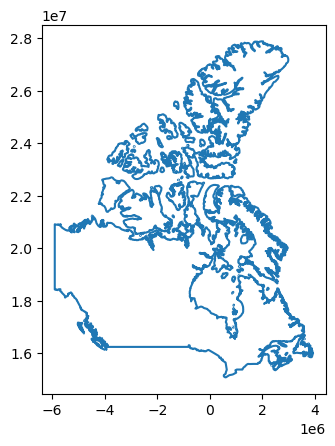

In [6]:
canada.boundary.plot()

In [7]:
# 3. Turn the boundary into a GDF

In [8]:
type(canada.boundary)

geopandas.geoseries.GeoSeries

In [9]:
canada.boundary.to_frame()

,0
0,"MULTILINESTRING ((385323.172 23951253.091, 386..."


In [10]:
# conversion
canada_border=canada.boundary.to_frame() 

# new column (optional)
canada_border['name']='Canada' 

# renaming the geometry column
canada_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
canada_border = canada_border.set_geometry("geometry")

# verifying:

new_crs = "EPSG:3978"
# Cambia el CRS del GeoDataFrame
canada = canada.to_crs(new_crs)
canada_cities = canada_cities.to_crs(new_crs)
canada_rivers = canada_rivers.to_crs(new_crs)

# Ahora, gdf tiene el nuevo CRS
canada_border.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
canada_border

,geometry,name
0,"MULTILINESTRING ((385323.172 23951253.091, 386...",Canada


In [12]:
# EJERCICIO 2

In [13]:
# 1. Look for sub administrative divisions of your country
# 2. Check all the CRSs of those divisions
# 3. If you find one CRS is missing, fill the CRS with the right projection.

In [14]:
canada.crs.to_epsg()==canada_cities.crs.to_epsg()==canada_rivers.crs.to_epsg()

True

In [15]:
canada.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
canada_cities.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
canada_rivers.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
# EJERCICIO 3

# 1. Look for some points in a CSV file about your country.

# 2. Turn those points into a spatial object.

# 3. Save the layer.

In [20]:
import pandas as pd
import os

infosalud= pd.read_csv(os.path.join("data", "canada_salud.csv"), encoding='latin1')
infosalud

,X,Y,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,...,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,notes
0,-66.692534,45.880100,582948489,node,21,NaN,pharmacy,NaN,New Maryland Highway,NaN,...,New Maryland Pharmacy,NaN,Adam Martin,NaN,NaN,NaN,yes,pharmacy,NaN,NaN
1,-75.655214,45.432050,6015802202,node,15,NaN,clinic,NaN,McArthur Avenue,NaN,...,Vertefeuille Pavilion,NaN,DannyMcD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-57.387417,47.524422,1530487853,node,9,NaN,hospital,NaN,NaN,NaN,...,NaN,NaN,bgamberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-122.338353,49.053303,4002895590,node,24,NaN,dentist,periodontics,Clearbrook Road,NaN,...,Profile Periodontics and Dental Implants,NaN,lokejul,NaN,NaN,NaN,NaN,dentist,NaN,NaN
4,-75.781798,45.330962,5759118145,node,15,NaN,pharmacy,NaN,Greenbank Road,NaN,...,Nepean Medical Pharmacy,NaN,DannyMcD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14427,-78.901336,43.889691,7075572124,node,15,NaN,pharmacy,NaN,NaN,NaN,...,I.D.A.,NaN,DannyMcD,NaN,NaN,NaN,yes,pharmacy,NaN,NaN
14428,-122.823628,49.192049,4892310626,node,15,NaN,NaN,acupuncture,NaN,NaN,...,Spring Health Centre,NaN,Matthew Darwin,NaN,NaN,NaN,NaN,alternative,NaN,NaN
14429,-79.767718,43.692209,887575465,node,18,NaN,doctors,NaN,Main Street North,NaN,...,Brampton East Medical Group/Queenwest Medical ...,NaN,Matthew Darwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14430,-79.401139,43.718669,7120482520,node,24,NaN,pharmacy,NaN,Yonge Street,NaN,...,Glengrove Pharmacy,NaN,DannyMcD,NaN,NaN,NaN,yes,pharmacy,NaN,NaN


In [21]:
# bye first row 
infoavion.drop(index=0,inplace=True)
infoavion.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['amenity', 'X','Y','healthcare','name']
infoavion=infoavion.loc[:,keep]
infoavion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14431 entries, 0 to 14430
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   amenity     12581 non-null  object 
 1   X           11075 non-null  float64
 2   Y           11075 non-null  float64
 3   healthcare  10672 non-null  object 
 4   name        13288 non-null  object 
dtypes: float64(2), object(3)
memory usage: 563.8+ KB


<Axes: xlabel='X', ylabel='Y'>

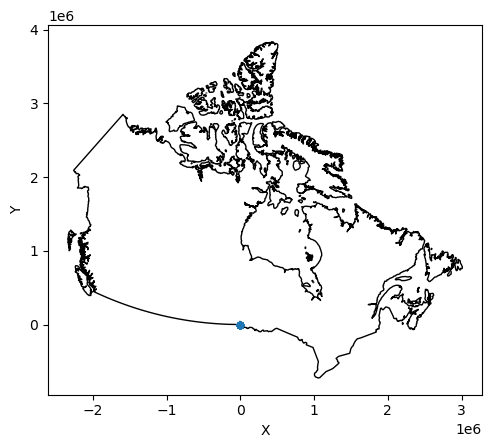

In [23]:
# let's plot

base = canada.plot(color='white', edgecolor='black') #unprojected

infoavion.plot.scatter(x = 'X', y = 'Y',ax=base)

In [28]:
salud=gpd.GeoDataFrame(data=infosalud.copy(),
                 geometry=gpd.points_from_xy(infosalud.X,
                                             infosalud.Y), 
                 crs=3978)# the coordinates were in degrees - unprojected

In [29]:
salud = salud.to_crs(3978)

<Axes: >

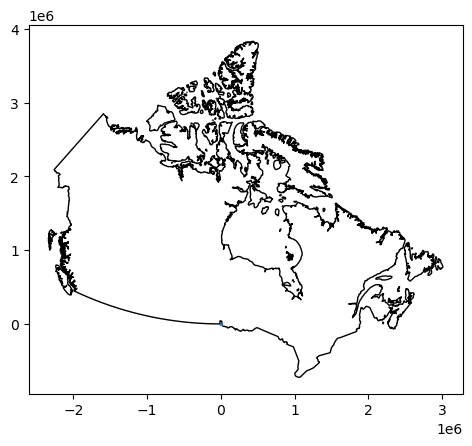

In [30]:
# let's plot

base = canada.plot(color='white', edgecolor='black')
salud.plot(ax=base,markersize=1)